In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import warnings
from scipy import interpolate

sns.set_context("talk")
mpl.style.use("seaborn")
sns.set_context("paper",font_scale=1.5)
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [28]:
def conditionChecker(star,alpha,posCols,velCols):
    positionSum  = 0
    kinematicSum = 0
    for i in np.arange(0,len(posCols),1):
        positionSum += star[posCols[i]]**2
    for i in np.arange(0,len(velCols),1):
        kinematicSum += star[velCols[i]]**2
        
    condition1   = (positionSum  <= 1)
    condition2   = (kinematicSum <= 1)
    condition3   = (positionSum+kinematicSum <= 2*alpha**2)
    
    sampleVi     = star[(condition1 & condition2 & condition3)]
    sampleVu     = star[(condition1 & condition2) | condition3]
    
    if sampleVi.shape[0] > 0:
        J = sampleVi.shape[0]/sampleVu.shape[0]
    else:
        J = 0
    
    return J

# 6-D case

In [29]:
epsilon1   = 1
epsilon2   = 1
rangeAlpha = np.arange(2**(-1/2),1,0.01)
n          = int(10**7)
J          = []
bestAlpha  = rangeAlpha[0]
maxJ       = 0

In [30]:
for alphaInd in np.arange(0,len(rangeAlpha),1):
    alpha = rangeAlpha[alphaInd]
    sumVi = 0
    sumVu = 0
    star = pd.DataFrame({'X':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'Y':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'Z':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'U':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'V':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'W':np.random.uniform(-np.sqrt(2),np.sqrt(2),n)})
    J += [conditionChecker(star,alpha,['X','Y','Z'],['U','V','W'])]
    if J[alphaInd] > maxJ:
        maxJ      = J[alphaInd]
        bestAlpha = alpha
J6D         = J
maxJ6D      = maxJ
bestAlpha6D = bestAlpha

In [31]:
print(bestAlpha)
print(maxJ)

0.8771067811865477
0.6274804087805325


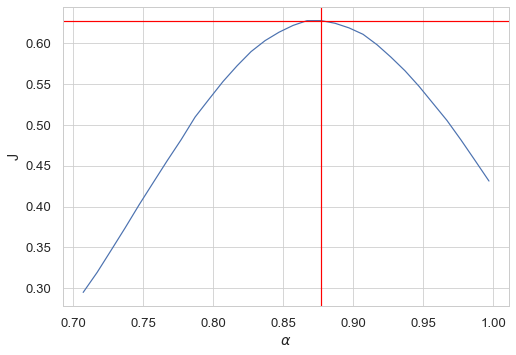

In [32]:
plt.plot(rangeAlpha,J);
plt.axvline(bestAlpha,color='red');
plt.axhline(maxJ,color='red');
plt.xlabel(r'$\alpha$');
plt.ylabel('J');
plt.show();

# 5-D case

In [33]:
epsilon1   = 1
epsilon2   = 1
rangeAlpha = np.arange(2**(-1/2),1,0.01)
n          = int(10**7)
J          = []
bestAlpha  = rangeAlpha[0]
maxJ       = 0

In [34]:
for alphaInd in np.arange(0,len(rangeAlpha),1):
    alpha = rangeAlpha[alphaInd]
    sumVi = 0
    sumVu = 0
    star = pd.DataFrame({'X':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'Y':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'Z':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'U':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'V':np.random.uniform(-np.sqrt(2),np.sqrt(2),n)})
    J += [conditionChecker(star,alpha,['X','Y','Z'],['U','V'])]
    if J[alphaInd] > maxJ:
        maxJ      = J[alphaInd]
        bestAlpha = alpha
J5D         = J
maxJ5D      = maxJ
bestAlpha5D = bestAlpha

In [35]:
print(bestAlpha)
print(maxJ)

0.8571067811865477
0.6540406033037002


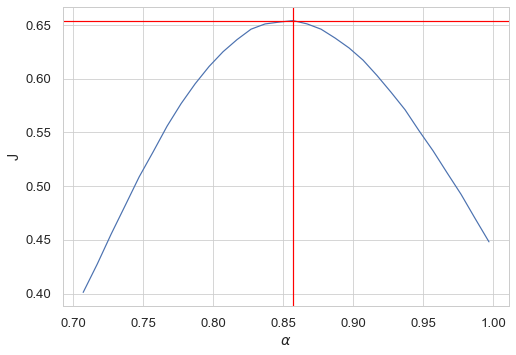

In [36]:
plt.plot(rangeAlpha,J);
plt.axvline(bestAlpha,color='red');
plt.axhline(maxJ,color='red');
plt.xlabel(r'$\alpha$');
plt.ylabel('J');
plt.savefig('Jalpha.png',bbox_inches='tight')
plt.show();

# 5 and 6 D plot

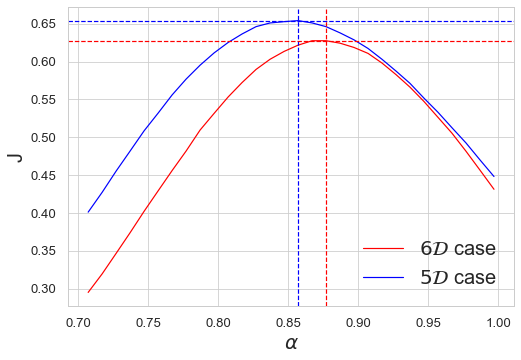

In [45]:
color5D = 'blue'
color6D = 'red'

plt.plot(rangeAlpha,J6D,color=color6D,label=r'$6\mathcal{D}$ case');
plt.plot(rangeAlpha,J5D,color=color5D,label=r'$5\mathcal{D}$ case');
plt.axvline(bestAlpha6D,color=color6D,linestyle='--');
plt.axvline(bestAlpha5D,color=color5D,linestyle='--');
plt.axhline(maxJ6D,color=color6D,linestyle='--');
plt.axhline(maxJ5D,color=color5D,linestyle='--');
plt.xlabel(r'$\alpha$',fontsize=20);
plt.ylabel('J',fontsize=20);
plt.legend(fontsize=20);
plt.savefig('Jalpha.png',bbox_inches='tight')
plt.show();

# 2-D case

In [11]:
epsilon1   = 1
epsilon2   = 1
rangeAlpha = np.arange(2**(-1/2),1,0.01)
n          = int(10**7)
J          = []
bestAlpha  = rangeAlpha[0]
maxJ       = 0

In [12]:
for alphaInd in np.arange(0,len(rangeAlpha),1):
    alpha = rangeAlpha[alphaInd]
    sumVi = 0
    sumVu = 0
    star = pd.DataFrame({'X':np.random.uniform(-np.sqrt(2),np.sqrt(2),n),
                         'Y':np.random.uniform(-np.sqrt(2),np.sqrt(2),n)})
    J += [conditionChecker(star,alpha,['X'],['Y'])]
    if J[alphaInd] > maxJ:
        maxJ      = J[alphaInd]
        bestAlpha = alpha

In [13]:
print(bestAlpha)
print(maxJ)

0.7771067811865476
0.8371165253294789


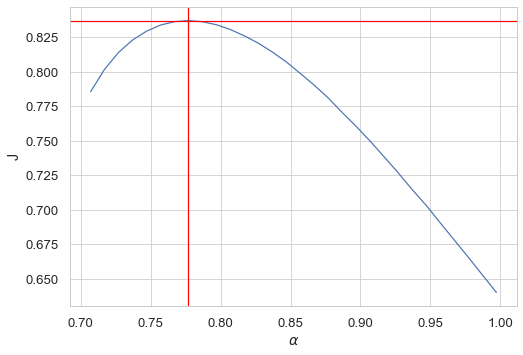

In [14]:
plt.plot(rangeAlpha,J);
plt.axvline(bestAlpha,color='red');
plt.axhline(maxJ,color='red');
plt.xlabel(r'$\alpha$');
plt.ylabel('J');
plt.show();

# Schematic representation

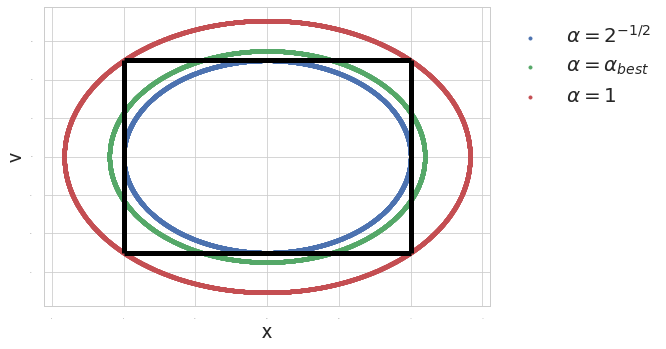

In [26]:
theta  = np.arange(0,2*np.pi,0.001)
rangeR = [1,bestAlpha*np.sqrt(2),np.sqrt(2)]
e1     = 1
e2     = 1/2

plt.vlines(-e1,ymin=-e2,ymax=e2,color='black',linewidth=5);
plt.vlines(e1,ymin=-e2,ymax=e2,color='black',linewidth=5);
plt.hlines(-e2,xmin=-e1,xmax=e1,color='black',linewidth=5);
plt.hlines(e2,xmin=-e1,xmax=e1,color='black',linewidth=5);

labels = [r'$\alpha=2^{-1/2}$',r'$\alpha=\alpha_{best}$',r'$\alpha=1$']

for rind in [0,1,2]:
    r = rangeR[rind]
    x = r*np.cos(theta)*e1
    y = r*np.sin(theta)*e2
    plt.scatter(x,y,s=10,label=labels[rind]);
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.xlabel('x',fontsize=20)
plt.ylabel('v',fontsize=20)
plt.legend(bbox_to_anchor=(0,0,1.4,1),fontsize=20);
plt.savefig('boxVsEllipse.png',bbox_inches='tight');
plt.show;

In [16]:
np.pi*r**2/8

0.7853981633974485